### Student Information
Name: 張筱萍

Student ID: `111065529`

GitHub ID: `hsiaoping-nthu`

Kaggle name: `yu`

Kaggle private scoreboard snapshot:

<img src='screenshot.jpg'>

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [1]:
import pandas as pd
import numpy as np

In [4]:
import json

# read json file
data = []
hashtags, tweet_ids, texts = [], [], []  # date information ?
with open('dm2022-isa5810-lab2-homework/tweets_DM.json', 'r') as f:
    for line in f:
        item = json.loads(line)['_source']['tweet']
        hashtags.append(item['hashtags'])
        tweet_ids.append(item['tweet_id'])
        texts.append(item['text'])

# convert to dataframe and export to csv file
df = pd.DataFrame(data={'hashtag': hashtags, 'tweet_id': tweet_ids, 'text': texts})
df.head()

,hashtag,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [ ]:
# # concat tweets, identification, and emotion
def merge_file_data():
    
    identification = pd.read_csv('dm2022-isa5810-lab2-homework/data_identification.csv', encoding= 'unicode_escape')
    emotion = pd.read_csv('dm2022-isa5810-lab2-homework/emotion.csv')
    
    temp_df = pd.merge(identification, emotion, how="left")
    all_df = pd.merge(df, temp_df)

    ## save data
    train_df = all_df[all_df.identification == 'train']
    test_df = all_df[all_df.identification == 'test']

    train_df.to_pickle("train_df.pkl") 
    test_df.to_pickle("test_df.pkl")

    print('train_df.shape: ', train_df.shape)
    print('test_df.shape: ', test_df.shape)
    
merge_file_data()

### load preprocessing data

In [5]:
## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

print('train_df.shape: ', train_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.head()

train_df.shape:  (1455563, 5)
test_df.shape:  (411972, 5)


,hashtag,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation


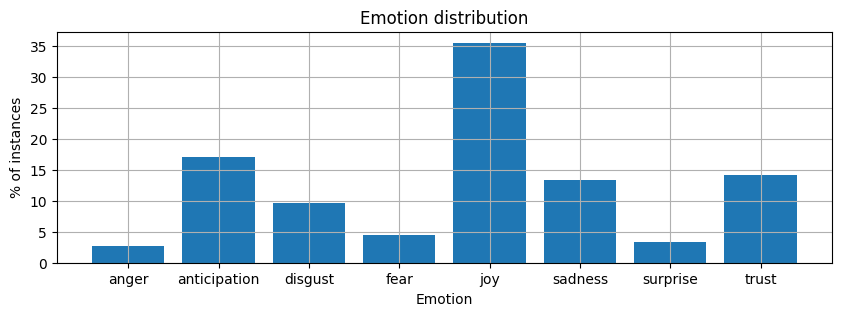

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

# plot
fig, ax = plt.subplots(figsize=(10,3))
plt.bar(df1.index,df1.values)

# arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

### Featue Engineering

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(train_df['text'])
vectorizer.get_feature_names_out()[100:110]

array(['asked', 'asking', 'ass', 'at', 'august', 'away', 'awesome',
       'awkward', 'baby', 'back'], dtype=object)

In [6]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopword = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hsiaoping.zhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

print('train_df.shape: ', train_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.head()

train_df.shape:  (1455563, 5)
test_df.shape:  (411972, 5)


,hashtag,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation


In [ ]:
import nltk
from nltk.corpus import stopwords

# filter with stopnwords may help performance
nltk.download('stopwords')
stopword = stopwords.words('english')

In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer

MAX_NUM_WORDS = 15000
total_train_count = len(train_df['text'])
train_fraction = 4

# Split train and test data
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'][:total_train_count//train_fraction], train_df['emotion'][:total_train_count//train_fraction], test_size=0.30, random_state=42)

y = train_df['emotion']

# Binarize labels with SKLearn label binarizer
encoder = LabelBinarizer()
y_train = encoder.fit_transform(Y_train)
y_test = encoder.fit_transform(Y_test)

# # Tokenize sentencs to numbers with max number 10000
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 25

# Pad sequences to max length with post padding.
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

X_train[0], y_train[0]

C:\Users\hsiaoping\AppData\Local\Temp\ipykernel_18544\3249289237.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train, X_test, y_train, y_test = train_test_split(train_df['text'][:total_train_count//5], train_df['emotion'][:total_train_count//5], test_size=0.30, random_state=42)


(array([ 326,    8,   28, 2127,   12,  445,    7,  284,    8,   34,    9,
         273, 9986,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0]),
 array([0, 0, 0, 0, 1, 0, 0, 0]))

resource : [glove.6B.100d.txt](https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt) 

In [43]:
# Load embedding file
embeddings_dictionary = dict()

with open('glove.6B.100d.txt', encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

embedding_matrix = np.zeros((vocab_size, 100))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
print("INFO: Creating model")

INFO: Creating model


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.python.keras.layers.embeddings import Embedding
from tensorflow.python.keras.layers.core import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM, Bidirectional, Conv1D

MAX_SEQUENCE_LENGTH = 25

# Create a Keras LSTM model with bidirectional layers
model = Sequential([
    Input(shape=(MAX_SEQUENCE_LENGTH,),dtype='int32'),
    Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),
    Bidirectional(LSTM(60, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation="relu"),
    Dense(8, activation="softmax")])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_9 (ModuleWra  (None, 25, 100)          21516400  
 pper)                                                           
                                                                 
 bidirectional_4 (Bidirectio  (None, 25, 100)          60400     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 120)              77280     
 nal)                                                            
                                                                 
 module_wrapper_10 (ModuleWr  (None, 64)               7744      
 apper)                                                          
                                                                 
 module_wrapper_11 (ModuleWr  (None, 8)               

In [45]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("INFO: Starting training")

history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.3)
print("INFO: Model done")

INFO: Starting training
Epoch 1/10
2229/2229 [==============================] - 158s 68ms/step - loss: 1.5323 - accuracy: 0.4362 - val_loss: 1.4296 - val_accuracy: 0.4774
Epoch 2/10
2229/2229 [==============================] - 145s 65ms/step - loss: 1.4139 - accuracy: 0.4838 - val_loss: 1.3690 - val_accuracy: 0.4994
Epoch 3/10
2229/2229 [==============================] - 147s 66ms/step - loss: 1.3651 - accuracy: 0.5034 - val_loss: 1.3445 - val_accuracy: 0.5087
Epoch 4/10
2229/2229 [==============================] - 143s 64ms/step - loss: 1.3340 - accuracy: 0.5139 - val_loss: 1.3195 - val_accuracy: 0.5204
Epoch 5/10
2229/2229 [==============================] - 146s 66ms/step - loss: 1.3108 - accuracy: 0.5231 - val_loss: 1.3044 - val_accuracy: 0.5254
Epoch 6/10
2229/2229 [==============================] - 148s 66ms/step - loss: 1.2915 - accuracy: 0.5303 - val_loss: 1.2975 - val_accuracy: 0.5302
Epoch 7/10
2229/2229 [==============================] - 149s 67ms/step - loss: 1.2767 - accura

In [59]:
# predict answer
test_predictions = model.predict(X_test)
print('predict:\n', test_predictions[:5], '- - -')

# convert to emotion words
test_predictions_original = encoder.inverse_transform(test_predictions)
print('convert:\n', test_predictions_original[:5])

3412/3412 [==============================] - 23s 7ms/step
predict:
 [[0.07564802 0.19193272 0.14714912 0.03386658 0.18761043 0.22362651
  0.03031613 0.10985048]
 [0.00341474 0.05610247 0.01268725 0.00512961 0.5521433  0.20591904
  0.01130412 0.15329953]
 [0.02771143 0.29375458 0.0680461  0.07472917 0.21776035 0.10304779
  0.03458373 0.18036683]
 [0.00092014 0.06151075 0.0024783  0.00471788 0.6007446  0.00867123
  0.00789956 0.31305748]
 [0.0121926  0.02273299 0.22455041 0.01118193 0.01990461 0.6606399
  0.03300128 0.0157963 ]] - - -
convert:
 ['sadness' 'joy' 'anticipation' 'joy' 'sadness']


In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=Y_test, y_pred=test_predictions_original)

print('training accuracy: {}'.format(round(acc_train, 2)))
print(classification_report(y_true=Y_test, y_pred=test_predictions_original))

training accuracy: 0.55
              precision    recall  f1-score   support

       anger       0.59      0.21      0.31      2891
anticipation       0.64      0.57      0.60     18614
     disgust       0.50      0.33      0.39     10446
        fear       0.74      0.32      0.45      4852
         joy       0.54      0.83      0.66     38882
     sadness       0.44      0.51      0.47     14433
    surprise       0.80      0.17      0.28      3590
       trust       0.68      0.26      0.37     15459

    accuracy                           0.55    109167
   macro avg       0.62      0.40      0.44    109167
weighted avg       0.58      0.55      0.53    109167



### predict private set

In [63]:
# private dataset is the competition dataset we need to predict
X_private = tokenizer.texts_to_sequences(test_df['text'])
X_private = pad_sequences(X_private, padding='post', maxlen=maxlen)
len(X_private)

411972

In [64]:
private_predictions = model.predict(X_private)
private_predictions_original = encoder.inverse_transform(private_predictions)
private_predictions_original[:5]

12875/12875 [==============================] - 531s 41ms/step


array(['anticipation', 'anticipation', 'sadness', 'joy', 'anticipation'],
      dtype='<U12')

In [66]:
test_df['emotion'] = private_predictions_original

ans_df = test_df[['tweet_id', 'emotion']]
ans_df = ans_df.rename(columns={"tweet_id": "id"})
ans_df.to_csv('answer.csv', index=False)  # write to file
print('finish')

finish


- - -

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier


transformer = TfidfTransformer()
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("TFIDF_feature.pkl", "rb")))

# for a classificaiton problem, you need to provide both training & testing data
X = transformer.fit_transform(loaded_vec.fit_transform(train_df['text'])).toarray()
y = train_df['emotion']
print('finish')

finish


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

x_test = transformer.fit_transform(loaded_vec.fit_transform(test_df['text'])).toarray()
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_val.shape: ', X_val.shape)
print('y_val.shape: ', y_val.shape)

X_train.shape:  (975227, 1000)
y_train.shape:  (975227,)
X_val.shape:  (480336, 1000)
y_val.shape:  (480336,)


## Deep Learning

In [10]:
# baseline method
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_val.shape: ', y_val.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_val.shape: ', y_val.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 247522     trust
1563748      joy
651597       joy
583951       joy
Name: emotion, dtype: object

y_train.shape:  (975227,)
y_val.shape:  (480336,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (975227, 8)
y_val.shape:  (480336, 8)


In [11]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  1000
output_shape:  8


In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
dense (Dense)                (None, 64)                64064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
softmax (Softmax)            (None, 8)                 0     

In [13]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 10
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data = (X_val, y_val))
print('training finish')

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-11-18 16:54:58.287352: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-18 16:54:58.289540: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


30445/30476 [============================>.] - ETA: 0s - loss: 1.4559 - accuracy: 0.4740 ETA: 2s - loss: 1.4641 - accuracy: 0.47 - ETA: 1s - loss: - ETA: 1s - loss: 1 - ETA: 0s - loss: 1.4595 - accuracy: 0.47 - ETA: 0sWARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2c06030d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
30

In [27]:
pred_result_val[:4]

array(['joy', 'joy', 'joy', 'anticipation'], dtype=object)

In [14]:
## validation result
from sklearn.metrics import accuracy_score

pred_result_val = model.predict(X_val, batch_size=128)
pred_result_val = label_decode(label_encoder, pred_result_val)

acc_val = accuracy_score(y_true=y_val, y_pred=pred_result_val)

print('val accuracy: {}'.format(round(acc_val, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_val, y_pred=pred_result_val))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [15]:
## predict
pred_result = model.predict(x_test, batch_size=128)
pred_result[:5]

array([[1.4010618e-02, 2.3327893e-01, 5.0355934e-02, 1.5532605e-02,
        4.7398803e-01, 8.6497433e-02, 1.7633773e-02, 1.0870266e-01],
       [2.8921964e-03, 6.7801422e-01, 5.3848973e-03, 7.8308238e-03,
        8.6882323e-02, 7.3034544e-03, 4.9636140e-03, 2.0672847e-01],
       [3.5215262e-02, 6.1228216e-02, 3.0504775e-01, 6.4646821e-03,
        2.3467743e-01, 1.8142213e-01, 2.9762523e-02, 1.4618208e-01],
       [3.8434294e-04, 3.5049424e-02, 3.5597985e-03, 1.6453075e-03,
        8.6833477e-01, 1.0229127e-03, 3.8350557e-04, 8.9619920e-02],
       [2.0002207e-02, 2.3798883e-01, 7.4520566e-02, 5.4311875e-02,
        2.8611848e-01, 9.1158509e-02, 2.5483822e-02, 2.1041575e-01]],
      dtype=float32)

In [16]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anticipation', 'disgust', 'joy', 'joy'], dtype=object)

In [17]:
test_df['emotion'] = pred_result

ans_df = test_df[['tweet_id', 'emotion']]
ans_df = ans_df.rename(columns={"tweet_id": "id"})
ans_df.to_csv('answer_baseline.csv', index=False)
print('finish')

finish
